# 중간고사

## ML 분류 RF, LR, DT 사용

### 
2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

In [37]:
# 사용 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [39]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [41]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


In [43]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [45]:
# 결측치 제거
df = df.dropna()


In [47]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 2. 범주형 변수를 숫자로 변환 (Label Encoding)
label_encoder = LabelEncoder()

df['buying'] = label_encoder.fit_transform(df['buying'])

df['maint'] = label_encoder.fit_transform(df['maint'])

df['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])

df['safety'] = label_encoder.fit_transform(df['safety'])

df['class'] = label_encoder.fit_transform(df['class'])

df['doors'] = label_encoder.fit_transform(df['doors'])

df['persons'] = label_encoder.fit_transform(df['persons'])

# 3. 상관 관계를 계산할 열들 선택
df_corr = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']]



array([[<Axes: title={'center': 'buying'}>,
        <Axes: title={'center': 'maint'}>,
        <Axes: title={'center': 'doors'}>],
       [<Axes: title={'center': 'persons'}>,
        <Axes: title={'center': 'lug_boot'}>,
        <Axes: title={'center': 'safety'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

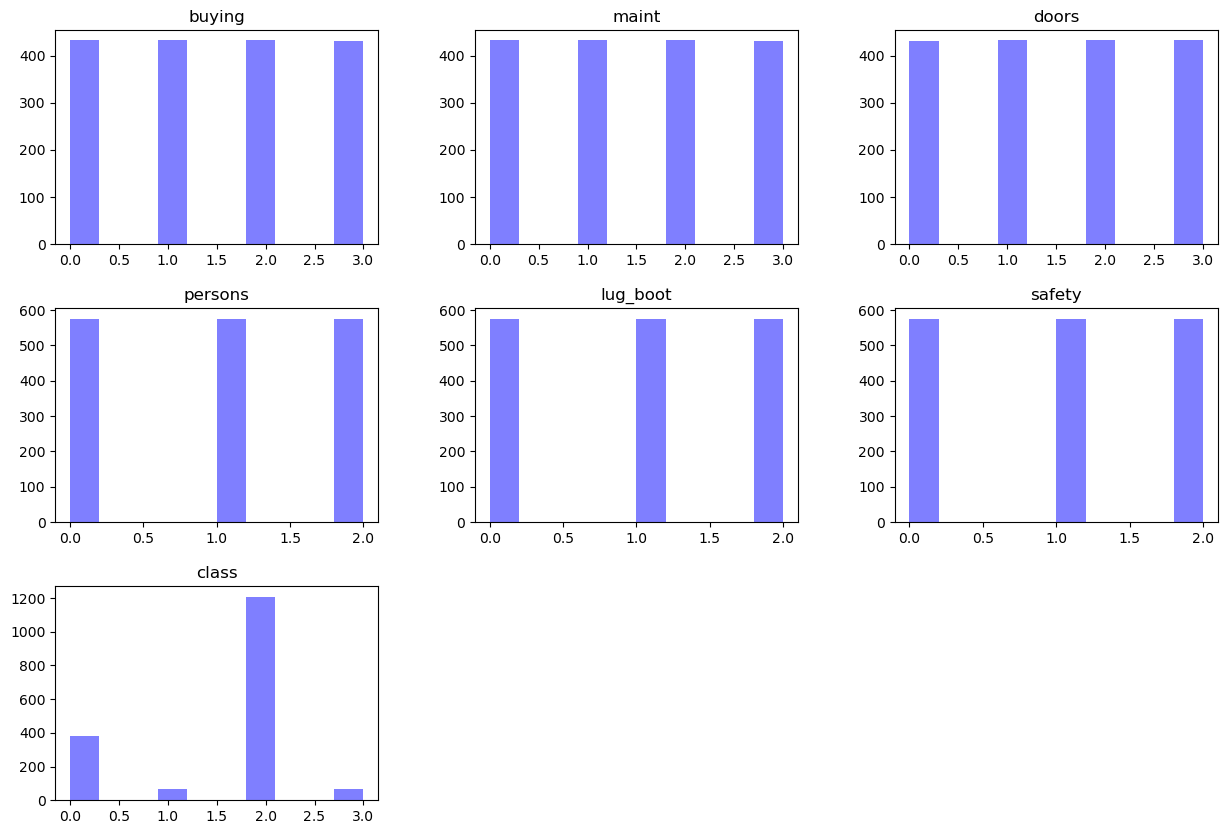

In [55]:
df.hist(figsize=(15, 10), grid=False, alpha=0.5, color='blue')

Text(0.5, 1.0, 'archive of class')

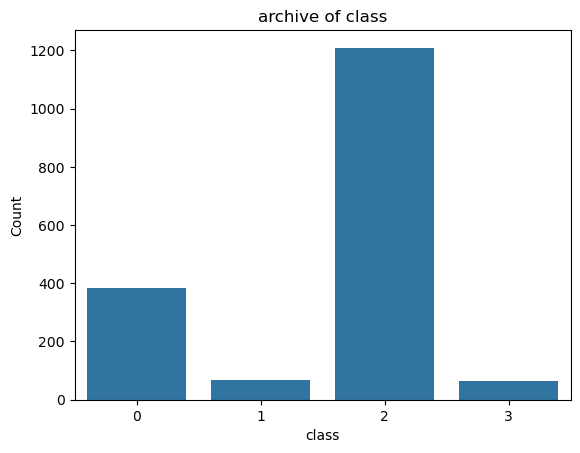

In [57]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x = "class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("archive of class")


In [59]:
df['class'].value_counts()

class
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [61]:
# Train Test Split

In [63]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [67]:
df_X = df.drop('class', axis = 1)
df_y = df['class']

In [99]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y,
                                                    test_size = 0.25, 
                                                    random_state = 32)

In [71]:
df_X.shape, df_y.shape

((1727, 6), (1727,))

IndexError: tuple index out of range

In [73]:
### 시계열 데이터를 CNN, LSTM 모델 등의 입력으로 변환하기 위한 split_sequences 함수로, 
### 주어진 시퀀스 데이터를 입력 (X)과 출력 (y)로 나누는 작업을 수행

from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [75]:
### 훈련 데이터와 테스트 데이터를 병합하여, 시퀀스 변환 함수(split_sequences)에 적용할 준비를 하는 과정
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

In [77]:

### split_sequences 함수를 사용하여 훈련 데이터와 테스트 데이터를 시퀀스로 변환하는 작업을 수행
n_step = 3

X_train_seq, y_train_seq = split_sequences(train_set, n_step)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, n_step)
print(X_test_seq.shape, y_test_seq.shape)

(1293, 3, 6) (1293,)
(430, 3, 6) (430,)


In [79]:

### CNN 모델을 위한 출력 변수(레이블)를 원-핫 인코딩 형식으로 변환하는 작업을 수행
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq = to_categorical(y_train_seq)
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq)
print(y_test_seq.shape)

(1293, 4)
(430, 4)


In [81]:
### CNN 모델의 입력과 출력 형상을 정의하기 위한 변수를 생성하는 작업을 수행
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

3 6 4


In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [85]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

### LSTM 기반의 딥러닝 모델을 구축하는 과정
# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,148 (336.52 KB)

 Trainable params: 86,148 (336.52 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
history = model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6648 - loss: 1.0174 - val_accuracy: 0.8077 - val_loss: 0.6287
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.5831 - val_accuracy: 0.8077 - val_loss: 0.6022
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.5704 - val_accuracy: 0.8077 - val_loss: 0.5504
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.5616 - val_accuracy: 0.8077 - val_loss: 0.5470
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.5607 - val_accuracy: 0.8077 - val_loss: 0.5507
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.5253 - val_accuracy: 0.8077 - val_loss: 0.5500
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.5141 - val_accuracy: 0.8077 - val_loss: 0.5503
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8206 - loss: 0.4994 - val_accuracy: 0.8077 - val_loss:

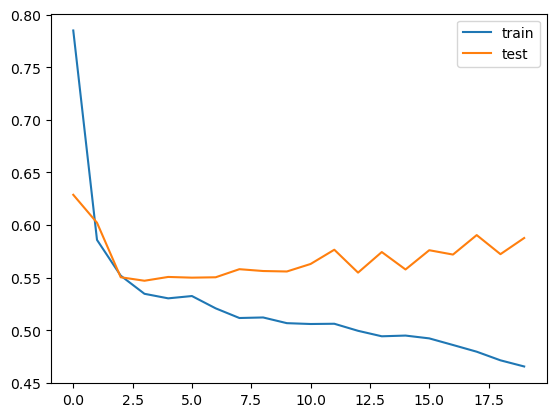

In [91]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [93]:
model.evaluate(X_train_seq, y_train_seq)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.8534 - loss: 0.4238


[0.46045592427253723, 0.8337200284004211]

In [95]:
model.evaluate(X_test_seq, y_test_seq)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8469 - loss: 0.4586 


[0.5215838551521301, 0.8186046481132507]

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix


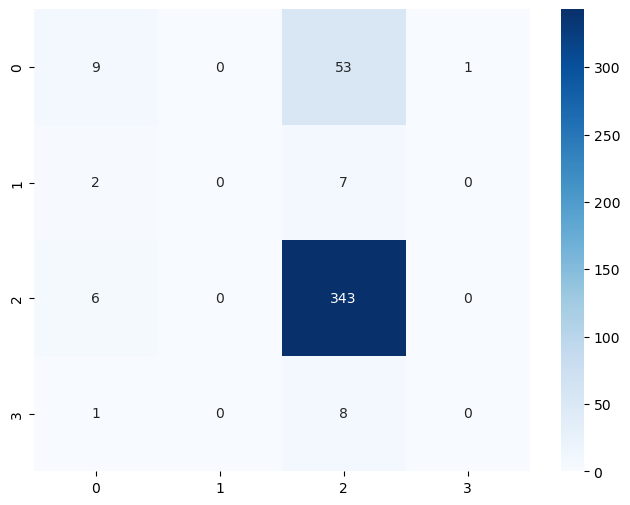

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()